In [3]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('FinalProjectData/Study_E.csv')

In [5]:
df[df['TxGroup'] == 'Control']

,Study,Country,PatientID,SiteID,RaterID,AssessmentID,TxGroup,VisitDay,P1,P2,...,G8,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total
1,E,Russia,50002,100038,150015,500679,Control,0,3,4,...,2,3,1,4,3,3,1,3,3,82
2,E,Russia,50002,100038,150015,500930,Control,38,3,4,...,3,4,1,3,3,3,1,2,3,77
3,E,Russia,50002,100038,150015,502177,Control,78,3,4,...,3,3,1,3,3,3,1,3,3,75
4,E,Russia,50002,100038,150015,501533,Control,119,3,3,...,2,4,1,3,3,3,2,3,3,76
5,E,Russia,50003,100008,150080,500270,Control,0,2,3,...,2,1,1,3,3,4,2,3,3,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,E,Russia,50508,100013,150027,500065,Control,153,1,3,...,1,1,1,1,4,3,1,1,1,48
1953,E,USA,50510,100037,150002,500869,Control,0,3,2,...,3,2,2,1,2,3,1,1,6,72
1954,E,USA,50511,100050,150038,501871,Control,0,3,1,...,2,3,1,3,2,1,2,3,1,58
1960,E,USA,50513,100050,150038,502061,Control,0,1,1,...,1,1,1,3,2,2,2,3,1,44


In [6]:
df[df['TxGroup'] == 'Treatment']

,Study,Country,PatientID,SiteID,RaterID,AssessmentID,TxGroup,VisitDay,P1,P2,...,G8,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total
0,E,USA,50001,100010,150112,501017,Treatment,0,4,3,...,2,3,3,1,4,1,3,3,4,70
10,E,Russia,50004,100008,150083,501749,Treatment,0,1,4,...,1,1,1,5,3,5,1,3,2,69
11,E,Russia,50004,100008,150083,500037,Treatment,36,1,4,...,1,1,1,5,3,5,1,3,2,69
12,E,Russia,50004,100008,150083,501799,Treatment,77,1,4,...,1,1,1,4,4,5,1,3,2,65
13,E,Russia,50004,100008,150083,501615,Treatment,120,1,3,...,1,1,1,4,4,5,1,3,2,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,E,Russia,50512,100019,150056,501374,Treatment,0,3,3,...,3,3,3,4,4,4,3,4,4,86
1956,E,Russia,50512,100019,150056,501007,Treatment,42,3,3,...,3,3,3,4,4,4,3,4,4,83
1957,E,Russia,50512,100019,150056,501752,Treatment,83,3,3,...,3,3,1,3,3,4,1,2,3,66
1958,E,Russia,50512,100019,150056,501624,Treatment,125,3,2,...,2,3,1,3,3,3,1,2,3,60


In [7]:
df_panss = df[['PatientID', 'VisitDay', 'PANSS_Total']][df['TxGroup'] == 'Treatment']

In [8]:
df_panss

,PatientID,VisitDay,PANSS_Total
0,50001,0,70
10,50004,0,69
11,50004,36,69
12,50004,77,65
13,50004,120,63
...,...,...,...
1955,50512,0,86
1956,50512,42,83
1957,50512,83,66
1958,50512,125,60


In [9]:
df_panss_diff = pd.DataFrame(columns=['PatientID', 'PANSS_Total_Diff'])

for patient_id in df_panss['PatientID'].unique():
    patient_panss = df_panss[df_panss['PatientID'] == patient_id]
    patient_panss_diff = patient_panss.iloc[-1]['PANSS_Total'] - patient_panss.iloc[0]['PANSS_Total']
    df_panss_diff = df_panss_diff.append({'PatientID': patient_id, 'PANSS_Total_Diff': patient_panss_diff}, ignore_index=True)
    
df_panss_diff

,PatientID,PANSS_Total_Diff
0,50001,0
1,50004,-7
2,50005,-19
3,50007,-6
4,50008,-27
...,...,...
244,50503,0
245,50505,-5
246,50507,6
247,50509,-8


In [10]:
df_panss_diff['Effective'] = df_panss_diff['PANSS_Total_Diff'] <= 0
df_panss_diff

,PatientID,PANSS_Total_Diff,Effective
0,50001,0,True
1,50004,-7,True
2,50005,-19,True
3,50007,-6,True
4,50008,-27,True
...,...,...,...
244,50503,0,True
245,50505,-5,True
246,50507,6,False
247,50509,-8,True


True     192
False     57
Name: Effective, dtype: int64 

True     0.771084
False    0.228916
Name: Effective, dtype: float64


Text(0.5, 1.0, 'Treatment Group')

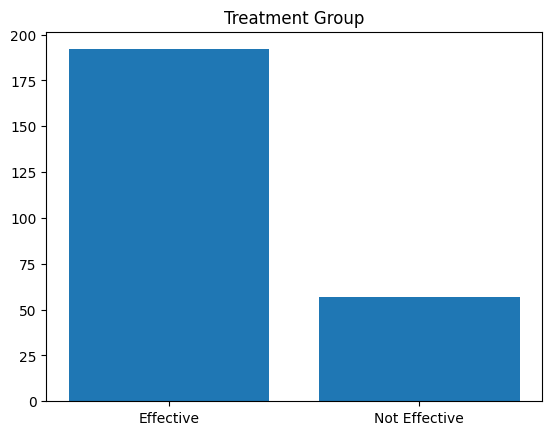

In [11]:
print(df_panss_diff['Effective'].value_counts(), '\n')
print(df_panss_diff['Effective'].value_counts(normalize=True))
plt.bar(['Effective', 'Not Effective'], [len(df_panss_diff[df_panss_diff['Effective'] == True]), len(df_panss_diff[df_panss_diff['Effective'] == False])])
plt.title('Treatment Group')

In [12]:
df_panss_control = df[['PatientID', 'VisitDay', 'PANSS_Total']][df['TxGroup'] == 'Control']

df_panss_control_diff = pd.DataFrame(columns=['PatientID', 'PANSS_Total_Diff'])

for patient_id in df_panss_control['PatientID'].unique():
    patient_panss = df_panss_control[df_panss_control['PatientID'] == patient_id]
    patient_panss_diff = patient_panss.iloc[-1]['PANSS_Total'] - patient_panss.iloc[0]['PANSS_Total']
    df_panss_control_diff = df_panss_control_diff.append({'PatientID': patient_id, 'PANSS_Total_Diff': patient_panss_diff}, ignore_index=True)
    
df_panss_control_diff

,PatientID,PANSS_Total_Diff
0,50002,-6
1,50003,-6
2,50006,10
3,50009,1
4,50010,-2
...,...,...
259,50506,0
260,50508,3
261,50510,0
262,50511,0


In [13]:
df_panss_control_diff['Effective'] = df_panss_control_diff['PANSS_Total_Diff'] <= 0
df_panss_control_diff

,PatientID,PANSS_Total_Diff,Effective
0,50002,-6,True
1,50003,-6,True
2,50006,10,False
3,50009,1,False
4,50010,-2,True
...,...,...,...
259,50506,0,True
260,50508,3,False
261,50510,0,True
262,50511,0,True


True     215
False     49
Name: Effective, dtype: int64 

True     0.814394
False    0.185606
Name: Effective, dtype: float64


Text(0.5, 1.0, 'Control Group')

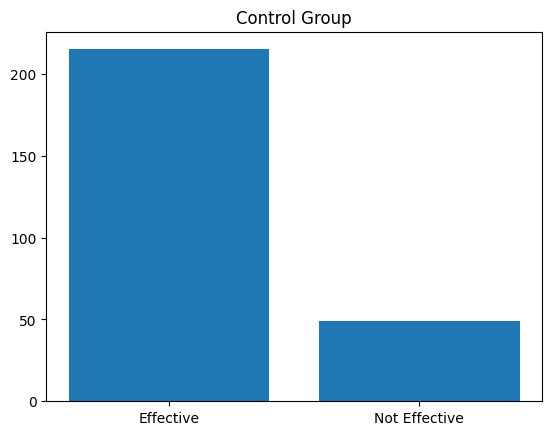

In [14]:
print(df_panss_control_diff['Effective'].value_counts(), '\n')
print(df_panss_control_diff['Effective'].value_counts(normalize=True))
plt.bar(['Effective', 'Not Effective'], [len(df_panss_control_diff[df_panss_control_diff['Effective'] == True]), len(df_panss_control_diff[df_panss_control_diff['Effective'] == False])])
plt.title('Control Group')

In [15]:
df_panss['PatientID'].value_counts()

50092    16
50098    16
50124    14
50398     7
50147     7
         ..
50441     1
50046     1
50453     1
50258     1
50001     1
Name: PatientID, Length: 249, dtype: int64

In [16]:
df_panss['PatientID'].value_counts()[df_panss['PatientID'].value_counts() >= 3]

50092    16
50098    16
50124    14
50398     7
50147     7
         ..
50164     3
50308     3
50251     3
50106     3
50268     3
Name: PatientID, Length: 180, dtype: int64

In [17]:
df_panss_effective = pd.DataFrame(columns=['PatientID', 'Effective'])

for patient_id in df_panss['PatientID'].value_counts()[df_panss['PatientID'].value_counts() >= 3].index:
    patient_panss = df_panss[df_panss['PatientID'] == patient_id]
    effective = False
    for i in range(len(patient_panss) - 2):
        if patient_panss.iloc[i]['PANSS_Total'] > patient_panss.iloc[i + 1]['PANSS_Total'] > patient_panss.iloc[i + 2]['PANSS_Total']:
            effective = True
            break
    df_panss_effective = df_panss_effective.append({'PatientID': patient_id, 'Effective': effective}, ignore_index=True)
    
df_panss_effective

,PatientID,Effective
0,50092,False
1,50098,False
2,50124,False
3,50398,True
4,50147,True
...,...,...
175,50164,False
176,50308,True
177,50251,False
178,50106,False


False    95
True     85
Name: Effective, dtype: int64 

False    0.527778
True     0.472222
Name: Effective, dtype: float64


Text(0.5, 1.0, 'Treatment Group')

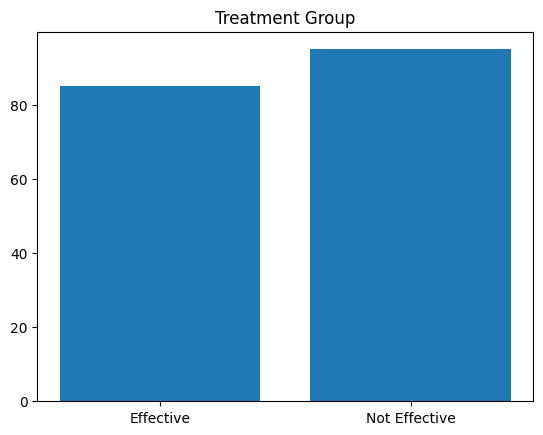

In [18]:
print(df_panss_effective['Effective'].value_counts(), '\n')
print(df_panss_effective['Effective'].value_counts(normalize=True))
plt.bar(['Effective', 'Not Effective'], [len(df_panss_effective[df_panss_effective['Effective'] == True]), len(df_panss_effective[df_panss_effective['Effective'] == False])])
plt.title('Treatment Group')

In [19]:
df_panss_control

,PatientID,VisitDay,PANSS_Total
1,50002,0,82
2,50002,38,77
3,50002,78,75
4,50002,119,76
5,50003,0,79
...,...,...,...
1947,50508,153,48
1953,50510,0,72
1954,50511,0,58
1960,50513,0,44


In [20]:
df_panss_control['PatientID'].value_counts()

50485    18
50031    16
50366    12
50122    10
50065     9
         ..
50119     1
50247     1
50110     1
50196     1
50415     1
Name: PatientID, Length: 264, dtype: int64

In [21]:
df_panss_control['PatientID'].value_counts()[df_panss_control['PatientID'].value_counts() >= 3]

df_panss_control_effective = pd.DataFrame(columns=['PatientID', 'Effective'])

for patient_id in df_panss_control['PatientID'].value_counts()[df_panss_control['PatientID'].value_counts() >= 3].index:
    patient_panss = df_panss_control[df_panss_control['PatientID'] == patient_id]
    effective = False
    for i in range(len(patient_panss) - 2):
        if patient_panss.iloc[i]['PANSS_Total'] > patient_panss.iloc[i + 1]['PANSS_Total'] > patient_panss.iloc[i + 2]['PANSS_Total']:
            effective = True
            break
    df_panss_control_effective = df_panss_control_effective.append({'PatientID': patient_id, 'Effective': effective}, ignore_index=True)
    
df_panss_control_effective

,PatientID,Effective
0,50485,False
1,50031,False
2,50366,False
3,50122,False
4,50065,False
...,...,...
189,50063,False
190,50267,False
191,50055,False
192,50285,True


True     102
False     92
Name: Effective, dtype: int64 

True     0.525773
False    0.474227
Name: Effective, dtype: float64


Text(0.5, 1.0, 'Control Group')

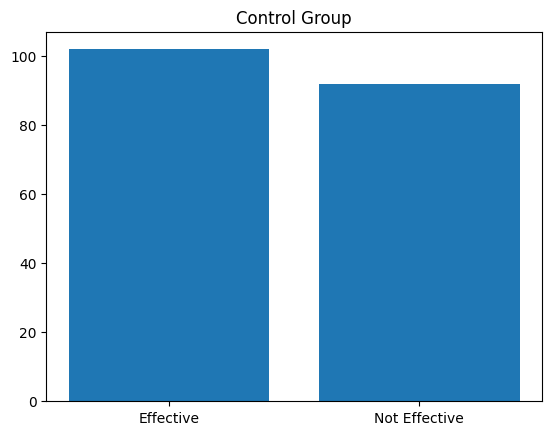

In [22]:
print(df_panss_control_effective['Effective'].value_counts(), '\n')
print(df_panss_control_effective['Effective'].value_counts(normalize=True))
plt.bar(['Effective', 'Not Effective'], [len(df_panss_control_effective[df_panss_control_effective['Effective'] == True]), len(df_panss_control_effective[df_panss_control_effective['Effective'] == False])])
plt.title('Control Group')